In [217]:
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [218]:
def read_name_file(link,format):
    txt_files = glob.glob(os.path.join(link,'*.{0}'.format(format)))
    return txt_files

In [219]:
file_csv = read_name_file('E:/Learn_python/lab/ady/file csv','csv')
year = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
values = {}
for i in file_csv:
    data = pd.read_csv(i)
    sub_data = []
    if len(data.values) < 6:
        if len(data.values) == 1:
            sub_data = [float(j) for j in data.values[0][-11:]]
            values[i.lstrip('E:/Learn_python/lab/ady/file csv\\').rstrip('.csv')] = sub_data
        else:
            for j in data.values:
                sub_data = [float(z) for z in j[-11:]]
                values[j[0]] = sub_data
    else:
        for j in data.columns[1:]:
            sub_data = [float(z) for z in data[j].values[-11:]]
            values[j] = sub_data
df = pd.DataFrame(values,index = year )
df
 

,Chỉ số GDP qua các năm,Chỉ số giá sản xuất công nghiệp (Năm trước = 100) chia theo Nhóm hàng và Năm,Chỉ số giá sản xuất dịch vụ (Năm trước = 100) chia theo Chỉ số giá sản xuất dịch vụ và Năm,"Chỉ số giá sản xuất nông, lâm nghiệp và thuỷ sản (Năm trước = 100) chia theo Ngành và Năm",Chỉ số giá tiêu dùng các tháng trong năm chia theo Các tháng (tháng trước = 100) và Năm,"Diện tích, dân số và mật độ dân số phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu",ực lượng lao động từ 15 tuổi trở lên phân theo địa phương() chia theo Địa phương và Năm,Tổng sản phẩm trong nước theo giá hiện hành - Tỷ đồng,Tích luỹ tài sản theo giá hiện hành - Tỷ đồng,Tiêu dùng cuối cùng theo giá hiện hành - Tỷ đồng,Xuất khẩu hàng hoá và dịch vụ theo giá hiện hành - Tỷ đồng,Nhập khẩu hàng hoá và dịch vụ theo giá hiện hành - Tỷ đồng,"Nông, lâm nghiệp và thuỷ sản",Công nghiệp và xây dựng,Dịch vụ,Thuế sản phẩm trừ trợ cấp sản phẩm,Tổng thiệt hại,Tổng số vốn thực hiện (Triệu đô la Mỹ)
2012,195.60,103.43,103.53,97.87,109.21,88809.30,52616.60,4073762.29,1244912.82,2694746.28,2585776.82,2434080.78,16.20,35.86,39.12,8.82,16000.0,10046.6
2013,213.70,105.25,103.05,100.57,106.60,89759.50,53549.30,4473655.60,1351621.25,3033143.59,2988421.89,2865193.39,15.22,35.58,40.54,8.67,27853.0,11500.0
2014,233.50,103.26,102.98,104.62,104.09,90728.90,54040.70,4937031.68,1495378.85,3324329.03,3436103.74,3249156.60,14.88,35.30,40.92,8.90,2828.0,12500.0
2015,239.30,99.42,101.28,99.72,100.63,91713.30,54266.00,5191323.73,1666877.77,3633279.88,3785661.31,3737305.40,14.47,34.27,42.19,9.07,8114.0,14500.0
2016,257.10,99.39,102.38,101.71,102.66,92695.10,54482.80,5639401.00,1789073.97,3898821.37,4179207.04,4021018.20,13.82,34.12,42.85,9.21,39726.0,15800.0
2017,281.40,102.82,103.63,99.92,103.53,93671.60,54819.60,6293904.55,2033264.80,4288217.21,5146055.08,4985877.73,12.93,35.39,42.58,9.10,60000.0,17500.0
2018,310.10,103.09,103.00,101.98,103.54,94666.00,55388.00,7009042.13,2244260.45,4683636.75,5917275.60,5624089.10,12.31,36.54,42.17,8.98,20000.0,19100.0
2019,334.40,101.25,103.06,101.31,102.79,96484.00,55767.40,7707200.29,2464759.62,5118113.29,6563265.82,6130817.91,11.78,36.80,42.47,8.94,6863.0,20380.0
2020,346.60,99.40,99.27,108.79,103.23,97582.69,54842.94,8044385.73,2567421.08,5264719.70,6787981.23,6344145.66,12.66,36.74,41.83,8.77,39962.0,19980.0
2021,366.10,102.91,100.95,102.12,101.84,98506.19,50560.50,8479666.50,2837931.42,5515650.50,7907491.92,7901059.55,12.56,37.48,41.21,8.75,5200.0,19740.0


In [220]:
df.describe()

,Chỉ số GDP qua các năm,Chỉ số giá sản xuất công nghiệp (Năm trước = 100) chia theo Nhóm hàng và Năm,Chỉ số giá sản xuất dịch vụ (Năm trước = 100) chia theo Chỉ số giá sản xuất dịch vụ và Năm,"Chỉ số giá sản xuất nông, lâm nghiệp và thuỷ sản (Năm trước = 100) chia theo Ngành và Năm",Chỉ số giá tiêu dùng các tháng trong năm chia theo Các tháng (tháng trước = 100) và Năm,"Diện tích, dân số và mật độ dân số phân theo địa phương chia theo Địa phương, Năm và Chỉ tiêu",ực lượng lao động từ 15 tuổi trở lên phân theo địa phương() chia theo Địa phương và Năm,Tổng sản phẩm trong nước theo giá hiện hành - Tỷ đồng,Tích luỹ tài sản theo giá hiện hành - Tỷ đồng,Tiêu dùng cuối cùng theo giá hiện hành - Tỷ đồng,Xuất khẩu hàng hoá và dịch vụ theo giá hiện hành - Tỷ đồng,Nhập khẩu hàng hoá và dịch vụ theo giá hiện hành - Tỷ đồng,"Nông, lâm nghiệp và thuỷ sản",Công nghiệp và xây dựng,Dịch vụ,Thuế sản phẩm trừ trợ cấp sản phẩm,Tổng thiệt hại,Tổng số vốn thực hiện (Triệu đô la Mỹ)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,290.146364,102.223636,102.441818,102.045455,103.751818,94007.117273,53821.701818,6.487518e+06,2.079417e+06,4.321430e+06,5.294406e+06,5.092783e+06,13.519091,36.030909,41.564545,8.885455,22367.818182,16676.600000
std,69.534869,2.052853,1.387378,2.927789,2.329480,3636.617333,1600.094264,1.789704e+06,6.340364e+05,1.101428e+06,2.097756e+06,2.060418e+06,1.486778,1.278753,1.093310,0.201562,17976.705164,4086.300581
min,195.600000,99.390000,99.270000,97.870000,100.630000,88809.300000,50560.500000,4.073762e+06,1.244913e+06,2.694746e+06,2.585777e+06,2.434081e+06,11.780000,34.120000,39.120000,8.530000,2828.000000,10046.600000
25%,236.400000,100.335000,101.830000,100.245000,102.725000,91221.100000,53082.950000,5.064178e+06,1.581128e+06,3.478804e+06,3.610883e+06,3.493231e+06,12.435000,35.345000,41.065000,8.760000,7488.500000,13500.000000
50%,281.400000,102.910000,103.000000,101.710000,103.230000,93671.600000,54266.000000,6.293905e+06,2.033265e+06,4.288217e+06,5.146055e+06,4.985878e+06,12.930000,35.860000,41.830000,8.900000,19500.000000,17500.000000
75%,340.500000,103.345000,103.295000,103.005000,103.815000,97033.345000,54831.270000,7.875793e+06,2.516090e+06,5.191416e+06,6.675624e+06,6.237482e+06,14.675000,36.770000,42.330000,9.025000,33789.500000,19860.000000
max,413.810000,105.250000,103.730000,108.790000,109.210000,99461.710000,55767.400000,9.513327e+06,3.178082e+06,6.081072e+06,8.941231e+06,8.727870e+06,16.200000,38.260000,42.850000,9.210000,60000.000000,22396.000000


In [221]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# split data
X = df[df.columns[1:]]
y = df[df.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# train model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# test in test_data
y_pred = linear_regression.predict(X_test)


In [222]:
w = linear_regression.coef_
b = linear_regression.intercept_
w,b

(array([-2.53272087e-06, -9.30662328e-07,  7.07937388e-06,  1.77073902e-06,
        -1.06696910e-03,  4.47395782e-04,  1.10700179e-04, -6.13269669e-05,
        -5.02782078e-05, -7.29690515e-05,  5.61143605e-05, -4.02968187e-07,
        -9.02654286e-07,  6.26672909e-07,  6.90960422e-07, -2.41730389e-06,
         2.20452901e-03]),
 57.66879027508267)

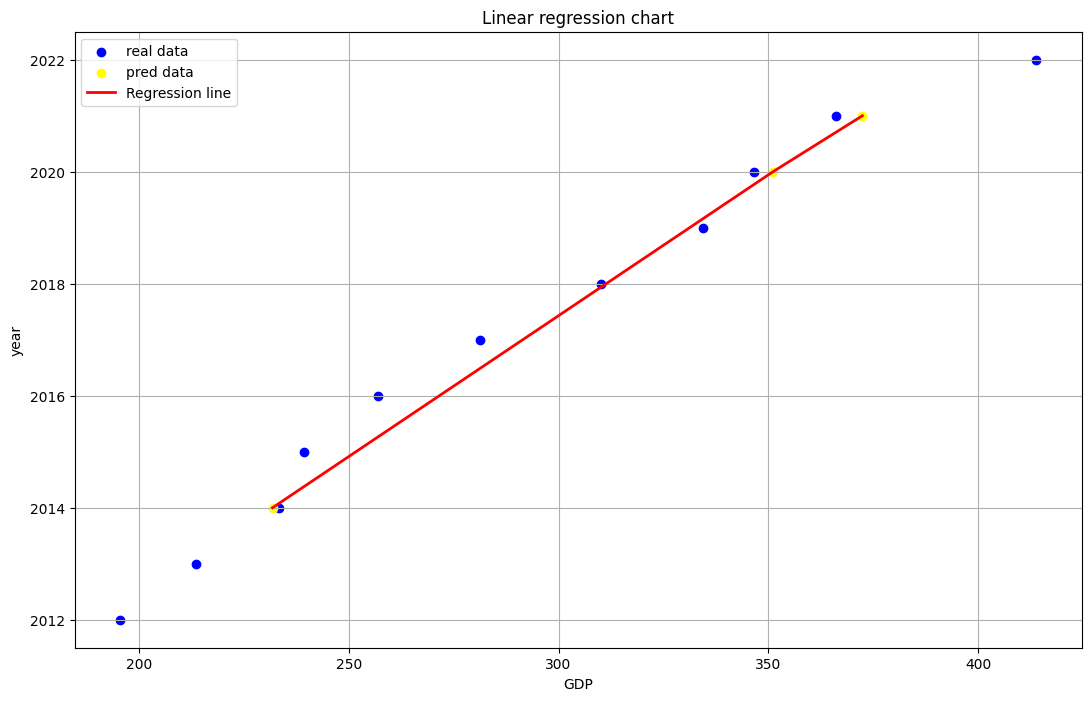

In [223]:
plt.figure(figsize=(13, 8))
plt.scatter(df[df.columns[0]],df[df.columns[0]].index,  color='blue', label='real data')  
plt.scatter(y_pred,X_test.index,  color='yellow', label='pred data')  
plt.plot( y_pred,X_test.index, color='red', linewidth=2, label='Regression line')
plt.xlabel('GDP')
plt.ylabel('year')
plt.title('Linear regression chart')
plt.legend()
plt.grid()
plt.show()

In [224]:
from sklearn.metrics import mean_squared_error

rmspe_value = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
print("RMSPE:", rmspe_value)

rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_value)

RMSPE: 0.013062095032376387
RMSE: 4.5605602653682205


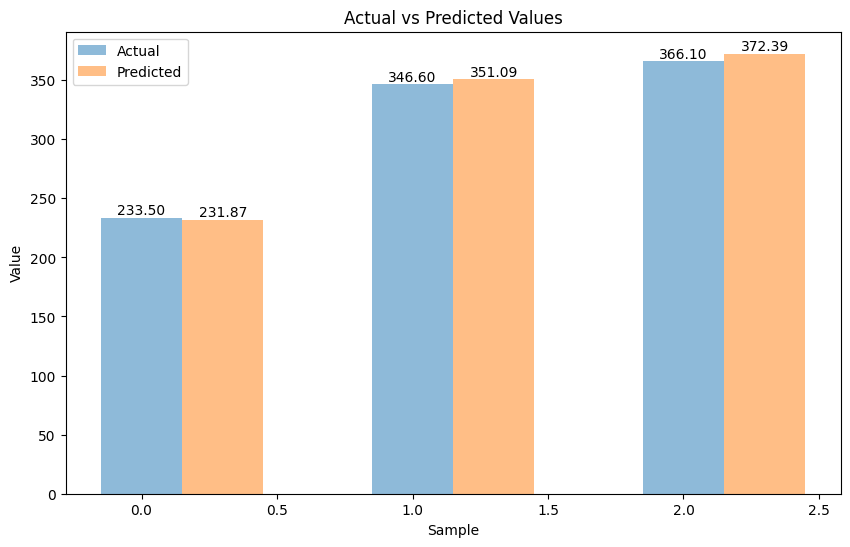

In [225]:
#plt
plt.figure(figsize=(10, 6))
bar_width = 0.3  

plt.bar(np.arange(len(y_test)), y_test, width=bar_width, alpha=0.5, label='Actual')

plt.bar(np.arange(len(y_test)) + bar_width, y_pred, width=bar_width, alpha=0.5, label='Predicted')

for i, (actual, pred) in enumerate(zip(y_test, y_pred)):
    plt.text(i, actual, f'{actual:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, pred, f'{pred:.2f}', ha='center', va='bottom')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()